# Predicting Pulsar Star
Pulsar candidates collected during the High Time Resolution Universe Survey
- original dataset: https://archive.ics.uci.edu/ml/datasets/HTRU2
- kaggle competition: https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate 

### About Dataset
**Description**

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

Credit goes to Pavan Raj (https://www.kaggle.com/pavanraj159) from where the dataset has been collected. For the purpose of creating a challenge, certain modifications have been done to the dataset.

Original dataset can be acquired from the link Predicting a Pulsar Star (https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star)
Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

HTRU 2 Summary
17,898 total examples.
1,639 positive examples.
16,259 negative examples.

Source: https://archive.ics.uci.edu/ml/datasets/HTRU2

Dr Robert Lyon
University of Manchester
School of Physics and Astronomy
Alan Turing Building
Manchester M13 9PL
United Kingdom
robert.lyon '@' manchester.ac.uk

## Imports

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

## EDA

In [106]:
# read data and rename column names for better readability and clarity.
new_columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
               'mean_DM_SNR', 'std_DM_SNR', 'kurtosis_DM_SNR', 'skewness_DM_SNR', 'target']

df_train = pd.read_csv('archive/pulsar_data_train.csv')
df_test = pd.read_csv('archive/pulsar_data_test.csv')

df_train.columns = new_columns
df_test.columns = new_columns
df_train.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_DM_SNR,std_DM_SNR,kurtosis_DM_SNR,skewness_DM_SNR,target
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [107]:
# basic informations of trainset
display(df_train.describe())
df_train.info()
df_train.isna().sum()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_DM_SNR,std_DM_SNR,kurtosis_DM_SNR,skewness_DM_SNR,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      12528 non-null  float64
 1   std_profile       12528 non-null  float64
 2   kurtosis_profile  10793 non-null  float64
 3   skewness_profile  12528 non-null  float64
 4   mean_DM_SNR       12528 non-null  float64
 5   std_DM_SNR        11350 non-null  float64
 6   kurtosis_DM_SNR   12528 non-null  float64
 7   skewness_DM_SNR   11903 non-null  float64
 8   target            12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


mean_profile           0
std_profile            0
kurtosis_profile    1735
skewness_profile       0
mean_DM_SNR            0
std_DM_SNR          1178
kurtosis_DM_SNR        0
skewness_DM_SNR      625
target                 0
dtype: int64

In [108]:
# kaggle test
#display(df_test.head())
display(df_test.describe())
df_test.info()
df_test.isna().sum()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_DM_SNR,std_DM_SNR,kurtosis_DM_SNR,skewness_DM_SNR,target
count,5370.000000,5370.000000,4603.000000,5370.000000,5370.000000,4846.000000,5370.000000,5126.000000,0.0
mean,111.168917,46.615074,0.483676,1.751260,12.473587,26.425371,8.233724,102.869088,NaN
std,25.608635,6.940638,1.076893,6.072820,29.145134,19.384489,4.435683,104.748418,NaN
min,6.179688,24.791612,-1.876011,-1.764717,0.213211,7.370432,-2.721857,-1.964998,NaN
25%,101.041016,42.408020,0.030643,-0.189557,1.956522,14.555826,5.700461,33.817330,NaN
50%,114.757812,47.031304,0.227314,0.186468,2.830686,18.549670,8.383695,81.392046,NaN
75%,127.023438,51.133444,0.475056,0.918807,5.590301,28.681787,10.632265,136.893502,NaN
max,192.617188,98.778911,7.608370,65.385974,223.392141,109.712649,34.539844,1191.000837,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      5370 non-null   float64
 1   std_profile       5370 non-null   float64
 2   kurtosis_profile  4603 non-null   float64
 3   skewness_profile  5370 non-null   float64
 4   mean_DM_SNR       5370 non-null   float64
 5   std_DM_SNR        4846 non-null   float64
 6   kurtosis_DM_SNR   5370 non-null   float64
 7   skewness_DM_SNR   5126 non-null   float64
 8   target            0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


mean_profile           0
std_profile            0
kurtosis_profile     767
skewness_profile       0
mean_DM_SNR            0
std_DM_SNR           524
kurtosis_DM_SNR        0
skewness_DM_SNR      244
target              5370
dtype: int64

There are missing values in: 
- **Excess kurtosis of the integrated profile**,
- **Standard deviation of the DM-SNR curve** and
- **Skewness of the DM-SNR curve**

in both datasets (train and test). The test dataset does not contain any values for the target class and is used as the aim dataset.

In [118]:
print('Missing values in % (trainset)')
print('---'*20)
df_train.isna().sum()/len(df_train)*100

Missing values in % (trainset)
------------------------------------------------------------


mean_profile         0.000000
std_profile          0.000000
kurtosis_profile    13.848978
skewness_profile     0.000000
mean_DM_SNR          0.000000
std_DM_SNR           9.402937
kurtosis_DM_SNR      0.000000
skewness_DM_SNR      4.988825
target               0.000000
dtype: float64

In [120]:
print('Missing values in % (testset)')
print('---'*20)
df_test.isna().sum()/len(df_test)*100

Missing values in % (testset)
------------------------------------------------------------


mean_profile          0.000000
std_profile           0.000000
kurtosis_profile     14.283054
skewness_profile      0.000000
mean_DM_SNR           0.000000
std_DM_SNR            9.757914
kurtosis_DM_SNR       0.000000
skewness_DM_SNR       4.543762
target              100.000000
dtype: float64

In both datasets, the percentage of missing data is roughly the same. The following section aims to investigate how the missing data can be handled to improve the quality of data analysis and modeling.

target
0.0    11375
1.0     1153
Name: count, dtype: int64


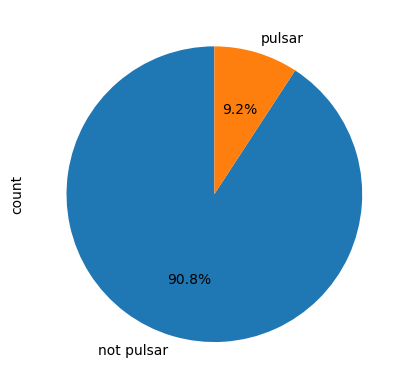

In [125]:
# target distribution
df_train['target'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90, labels=['not pulsar', 'pulsar'])
print(df_train['target'].value_counts())

The data is highly imbalanced. Only 9.2% of the datapoints is classified as pulsar.

<Axes: >

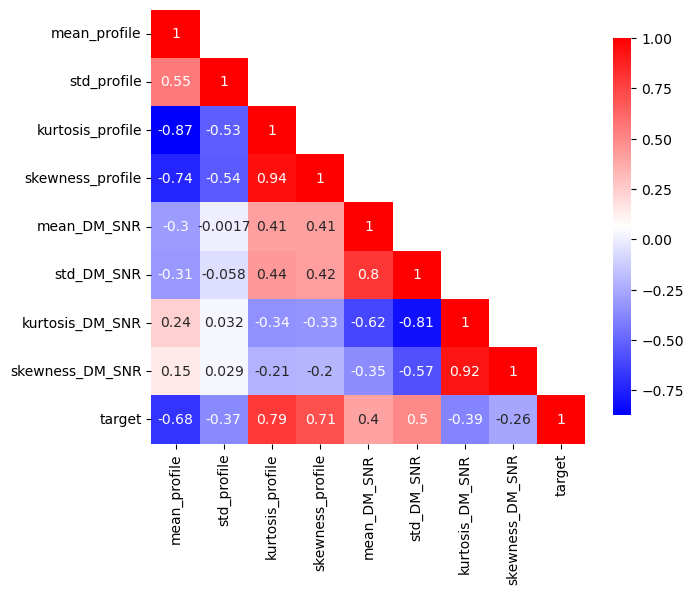

In [127]:
# correlations of the features
corr_matrix = df_train.corr()

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data=corr_matrix,
            annot=True,
            square=True,
           cbar_kws={"shrink": .7},
           cmap='bwr',
           mask=np.triu(corr_matrix,+1))

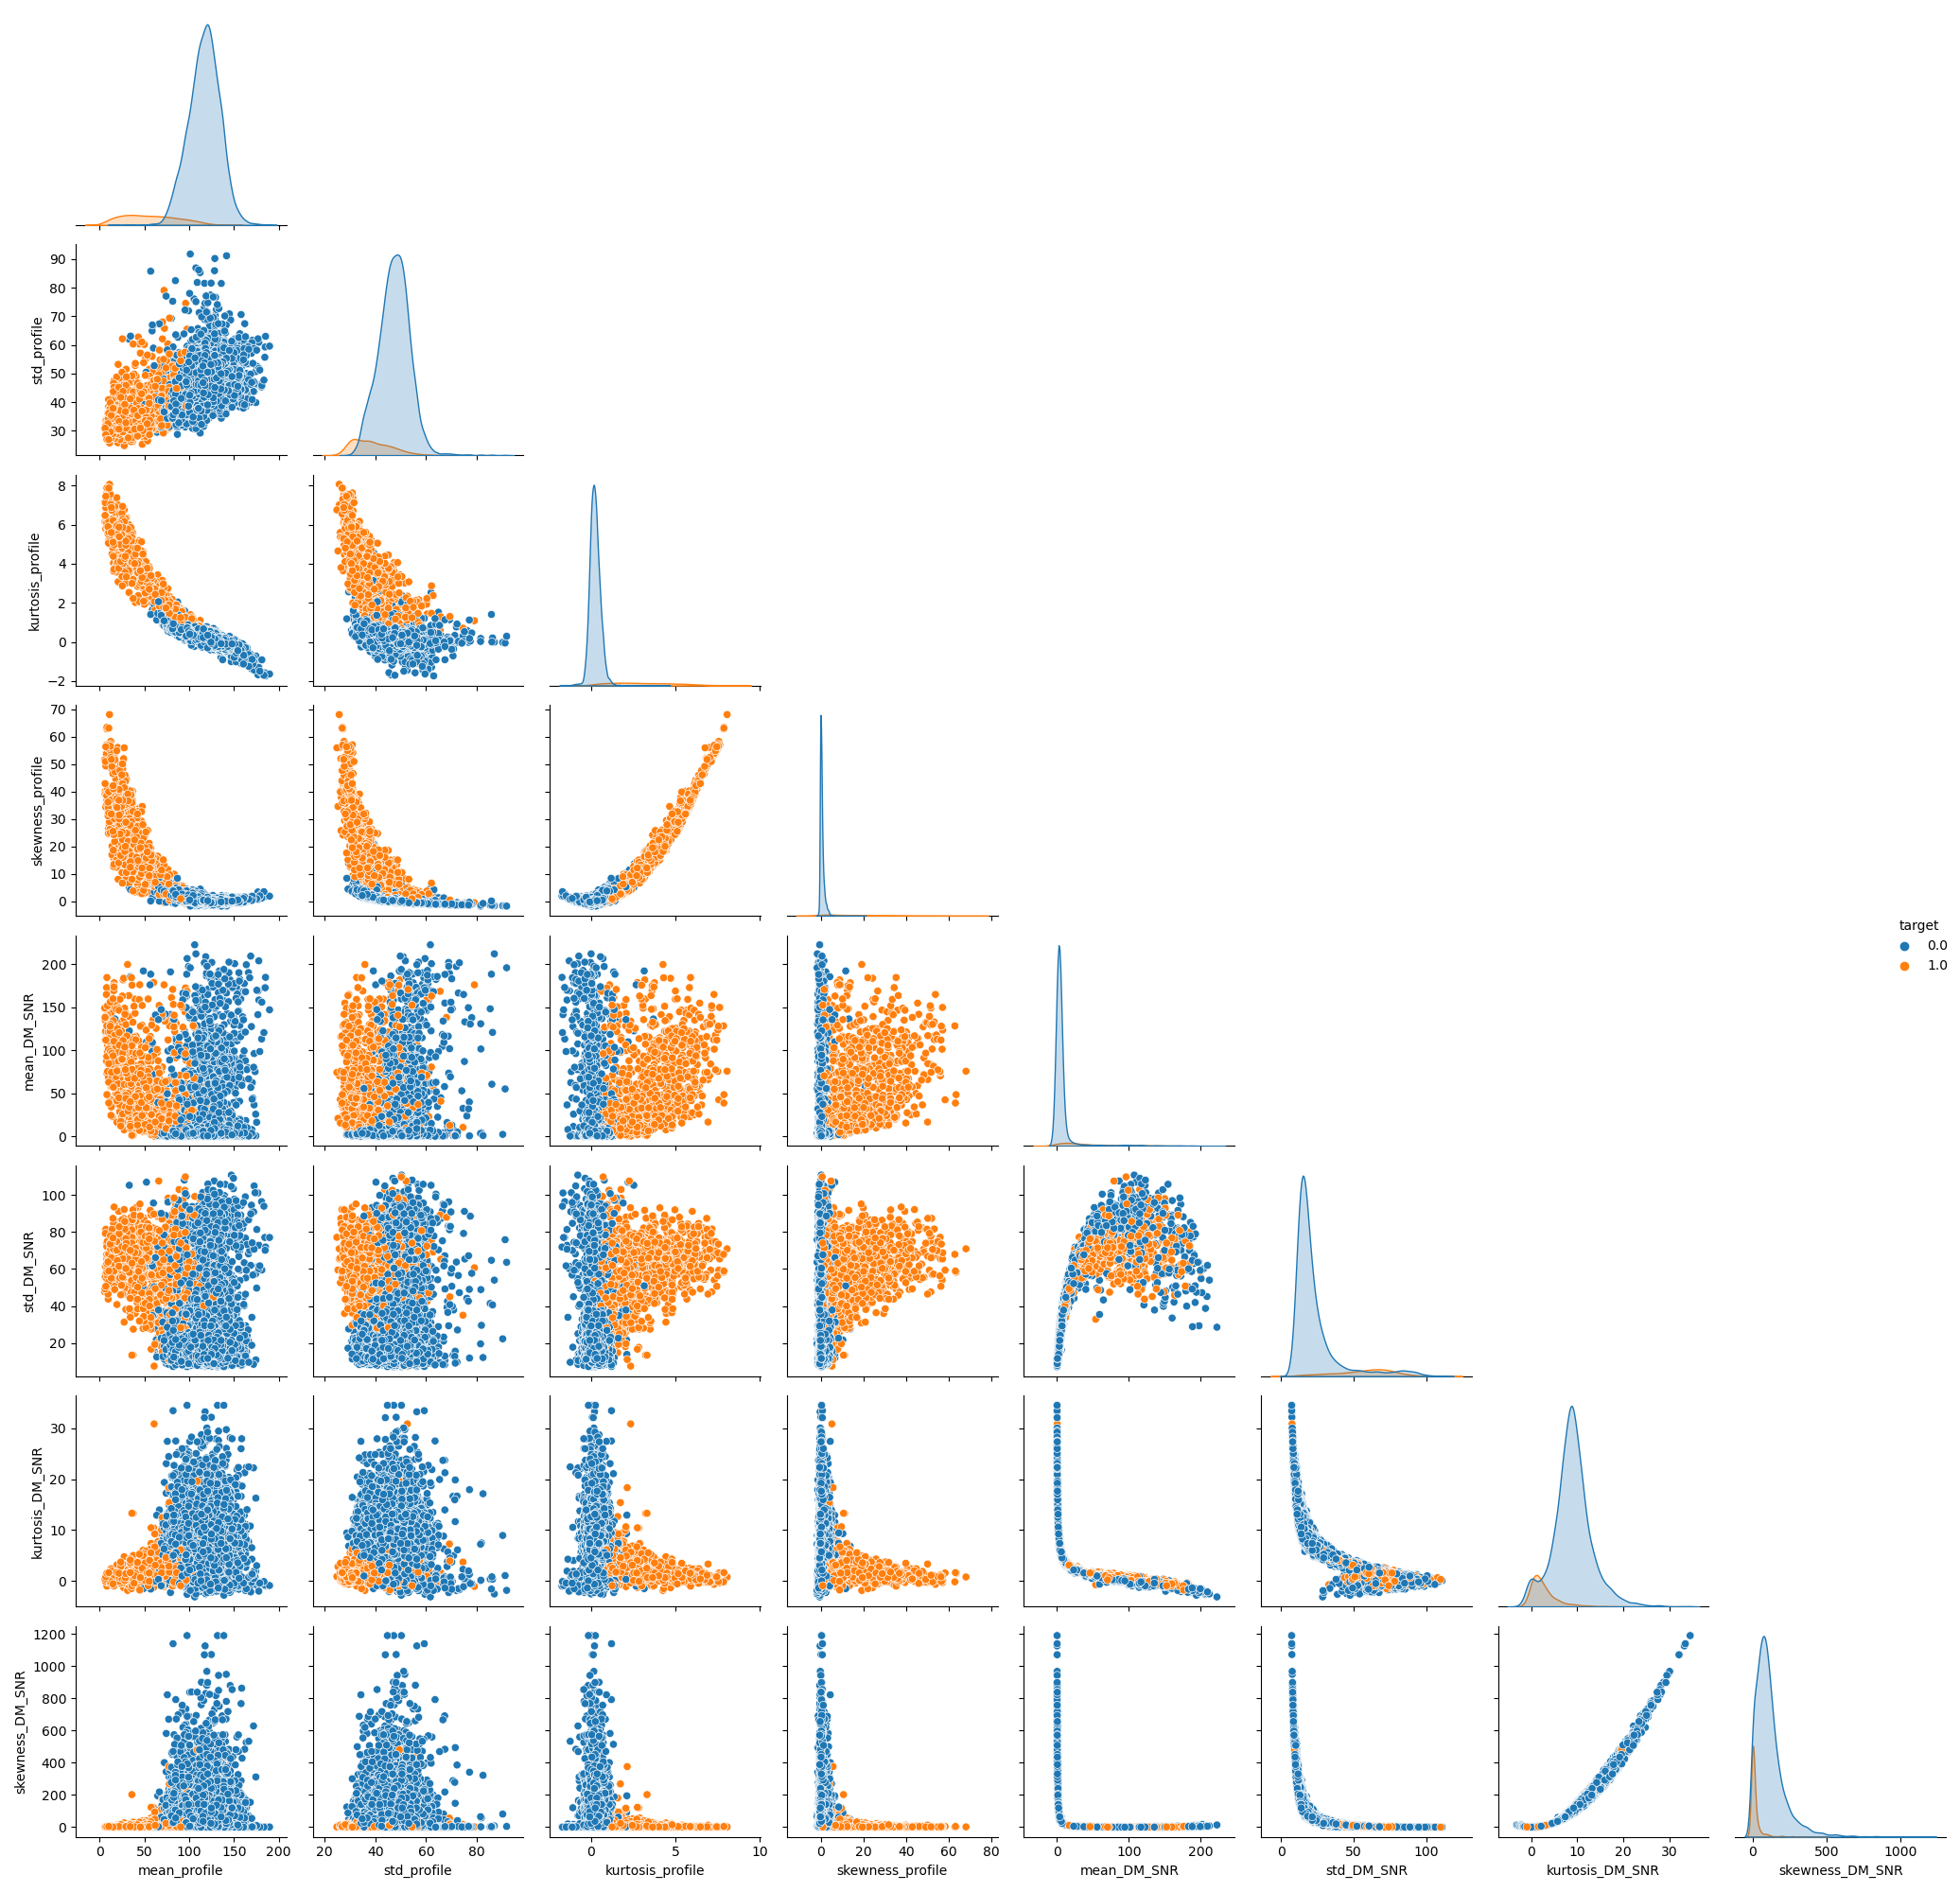

In [128]:
# check distribution of each feature

#sns.pairplot(data=df_train, hue='target', corner=True)
#plt.tight_layout()

#plt.savefig('pairplot_kaggle_train.png')
Image('pairplot_kaggle_train.png')

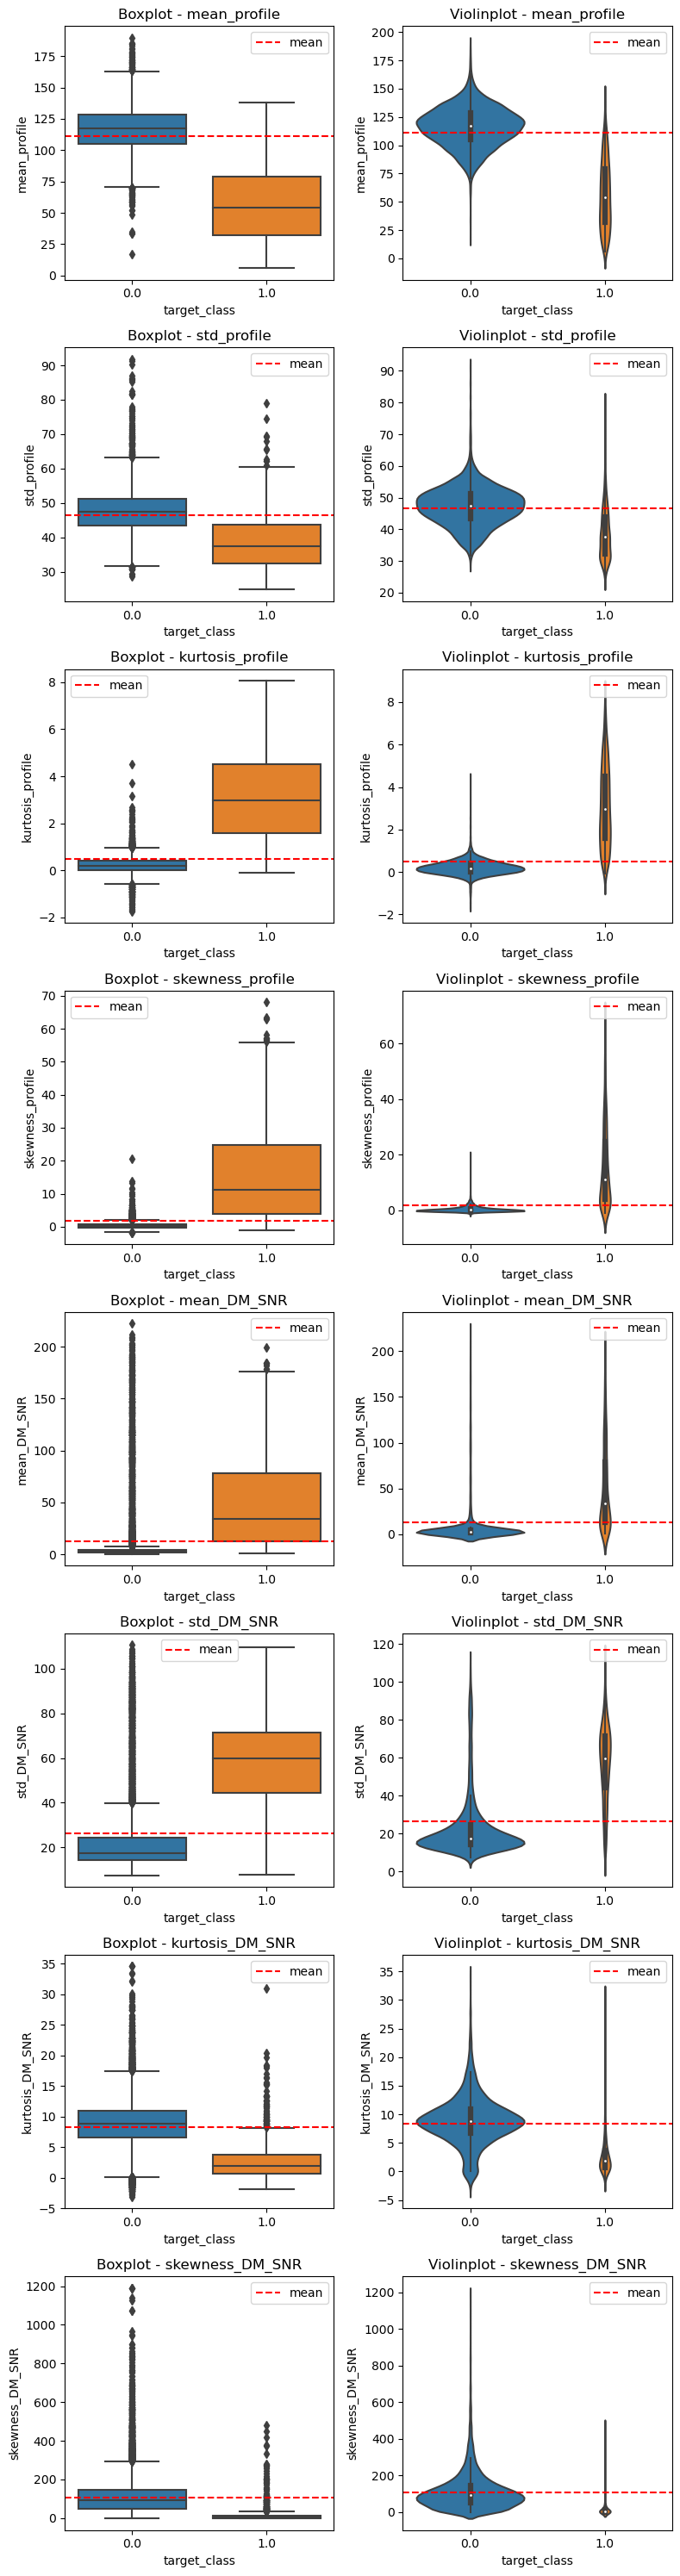

In [157]:
features = df_train.columns.to_list()

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(8, 30))
for i, feature in enumerate(features[:-1]):
    ax1 = axs[i,0]
    ax2 = axs[i,1]

    sns.boxplot(x=features[-1], y=feature, data=df_train, ax=ax1)
    ax1.set_xlabel('target_class')
    ax1.set_ylabel(feature)
    ax1.set_title('Boxplot - ' + feature)
    ax1.axhline(df_train[feature].mean(), color='r', linestyle='--', label='mean')
    ax1.legend()
    
    sns.violinplot(x=features[-1], y=feature, data=df_train, ax=ax2, scale='count')
    ax2.set_xlabel('target_class')
    ax2.set_ylabel(feature)
    ax2.set_title('Violinplot - ' + feature)
    ax2.axhline(df_train[feature].mean(), color='r', linestyle='--', label='mean')
    ax2.legend()
    
plt.tight_layout()

plt.show()
#plt.savefig('box_violin_trainset.png')